# Preprocessing

In [1]:
import numpy,pandas
from sklearn.decomposition import PCA
import numpy as np

#For the preprocessing we need the data from Dream9.xlsx
Dream9_training=pandas.read_excel('Dream9.xlsx',"trainingData") 
Dream9_scoring=pandas.read_excel('Dream9.xlsx',"scoringData")
Dream9=pandas.concat([Dream9_training,Dream9_scoring])

#Division of types of Variables
All=list(Dream9_training.keys())
Sc=list(Dream9_scoring.keys())

#Dependent variables are present in the training set but not in the scoring set
Dependent=[]
for v in All:
    if v not in Sc:
        Dependent+=[v]

#Categorical variables have discrete values and can't be measured by euclidean distances
Categorical=['SEX', 'PRIOR.MAL', 'PRIOR.CHEMO', 'PRIOR.XRT', 'Infection', 'cyto.cat', 
             'ITD', 'D835', 'Ras.Stat', 'resp.simple', 'Relapse', 'vital.status']

#The last 231 variables are proteins
Protein=All[-231:]

Trial_data=Dream9_training[Protein[:4]+Categorical[:4]+['cyto.cat']+Dependent].head()
Trial_data.T

,train_id_001,train_id_002,train_id_003,train_id_004,train_id_005
ACTB,0.1858447,0.2425015,0.555896,1.220082,0.2839293
AIFM1,-0.2178378,0.7707265,0.3315996,0.2330405,2.404975
AKT1,-0.09735044,0.2774968,-1.614516,1.548541,-1.526024
AKT1_2_3.pS473,-0.2723546,-0.518927,-1.046018,-1.120615,0.1153965
SEX,F,F,F,M,M
PRIOR.MAL,YES,NO,YES,NO,YES
PRIOR.CHEMO,NO,NO,YES,NO,NO
PRIOR.XRT,YES,NO,YES,NO,NO
cyto.cat,diploid,diploid,-5,IM,Misc
resp.simple,CR,CR,RESISTANT,CR,CR


## Categorical variables
As a first approach we converted all the categorical variables to quantitative variables. Qualitative variables were converted into binary variables. For example, binary conversion was taken with 1 being Yes, Positive, or Female and 0 being No, Negative, or Male. For values without information, we treated the variables as NaN. In the special case of the variable “cyto.cat”, which indicates the cytogenetic category of the patient, we created a variable for each posible category, and used a 1 for the category that the patient falls under and 0 for all the different categories. For example, if the category is diploid, the value on the column ‘cyto.cat=diploid’ is set to be 1, and the value on the rest of the columns corresponding to cyto.cat, as ‘cyto.cat=inv9’ or ‘cyto.cat=-5,-7’ is equal to 0. 

In [2]:
def alias(Table,aliases):
    Aliased=[]
    for key in Alias_Dict:
        if key in Table.keys():
            Series=Table[key]
            new_Series=pandas.Series()
            new_Series.name=Series.name
            for key2,data in zip(Series.keys(),Series):
                new_Series[key2]=0.0
                for val in aliases[key]:
                    try:
                        if numpy.isnan(data):
                            new_Series[key2]=numpy.nan
                    except:
                        pass             
                    if data==val:
                        new_Series[key2]=aliases[key][val]
                        break
            Aliased+=[new_Series]
    return pandas.concat(Aliased,axis=1)
    
    #Changes the values on a Series with aliases as a dict that transform the old values in the new values
    

def split(Series,All_Data):
    #For Series with multiple values, creates a table with a column for each unique value
    #The value is True for the correct column and False for all the other columns
    D=[]
    for value in All_Data[Series.name].unique():
        q=(Series==value)*1.0
        q.name='%s=%s'%(q.name,value)
        D+=[q]
    return pandas.concat(D,axis=1)

#Example
Alias_Dict={'SEX':{'F':1},'PRIOR.MAL':{'YES':1},'PRIOR.CHEMO':{'YES':1},'PRIOR.XRT':{'YES':1},
                'Infection':{'Yes':1},'ITD':{'POS':1,'ND':numpy.nan},'D835':{'POS':1,'ND':numpy.nan},
                'Ras.Stat':{'POS':1,'NotDone':numpy.nan},'resp.simple':{'CR':1},'Relapse':{'Yes':1},
                'vital.status':{'A':1}}
pandas.concat([Trial_data[Categorical[:4]+['cyto.cat']],alias(Trial_data,Alias_Dict),split(Trial_data['cyto.cat'],Dream9)],axis=1).T

,train_id_001,train_id_002,train_id_003,train_id_004,train_id_005
SEX,F,F,F,M,M
PRIOR.MAL,YES,NO,YES,NO,YES
PRIOR.CHEMO,NO,NO,YES,NO,NO
PRIOR.XRT,YES,NO,YES,NO,NO
cyto.cat,diploid,diploid,-5,IM,Misc
resp.simple,1,1,0,1,1
Relapse,0,1,NaN,1,1
vital.status,1,0,0,0,1
PRIOR.MAL,1,0,1,0,1
PRIOR.CHEMO,0,0,1,0,0


## Transformations on protein values
We noted that for some proteins, the extent of concentration was correlated with a change in the dependent variables. The protein data is normalized in a way that the expected mean is 0; values above the mean was 
assigned to be positive, and values below the mean was set to be negative. 

We created new variables to estimate the deviation from the mean squaring protein data to have better correlations to the expected values. 

In [3]:
def squared(Table):
    #This function squares all the values on a table
    D=[]
    for i,var in enumerate(Table.keys()):
        D+=[Table[var]**2]
        D[i].name='%s_Squared'%var
    return pandas.concat(D,axis=1)

def absolute(Table):
    #This function squares all the values on a table
    D=[]
    for i,var in enumerate(Table.keys()):
        D+=[(Table[var]**2)**0.5]
        D[i].name='%s_Absolute'%var
    return pandas.concat(D,axis=1)

#Example
pandas.concat([Trial_data[Protein[:4]],squared(Trial_data[Protein[:4]]),absolute(Trial_data[Protein[:4]])],axis=1).T

,train_id_001,train_id_002,train_id_003,train_id_004,train_id_005
ACTB,0.185845,0.242502,0.555896,1.220082,0.283929
AIFM1,-0.217838,0.770727,0.331600,0.233040,2.404975
AKT1,-0.097350,0.277497,-1.614516,1.548541,-1.526024
AKT1_2_3.pS473,-0.272355,-0.518927,-1.046018,-1.120615,0.115397
ACTB_Squared,0.034538,0.058807,0.309020,1.488601,0.080616
AIFM1_Squared,0.047453,0.594019,0.109958,0.054308,5.783904
AKT1_Squared,0.009477,0.077004,2.606662,2.397978,2.328749
AKT1_2_3.pS473_Squared,0.074177,0.269285,1.094153,1.255779,0.013316
ACTB_Absolute,0.185845,0.242502,0.555896,1.220082,0.283929
AIFM1_Absolute,0.217838,0.770727,0.331600,0.233040,2.404975


## Cutoff of Dependent Data

On the second iteration of the algorithm, we altered the dependent Data with a cutoff at 130 weeks. We realized that the patients that survive (“vital.status”) have a long life expectancy (“Overall Survival”), which may not be correlated to any variable, but instead depend solely on the length of the study. To prevent the overfitting of the prediction caused by this anomaly, we used a cutoff on the dependent variables. We changed the “Overall Survival” to suppose that all the patients that live longer than 2.5 years (130 weeks) live just 130 weeks. We applied the same logic for Remission.

On the third iteration we binned the dependent data according to the extended challenge. 1 for less than 52 weeks, 2 for less than 104 weeks but more than 52 weeks and 3 for more than 104 weeks.

In [4]:
def cutoff(Table,cutoff):
    #This function makes values above a threeshold equal to the threeshold
    Tab=[]
    for key0 in Table.keys():
        Series=Table[key0]
        new_Series=Table[key0].copy()
        for key,data in zip(Series.keys(),Series):
            if data>cutoff:
                new_Series[key]=cutoff
            else:
                new_Series[key]=data
        new_Series.name='%s_cut'%Series.name
        Tab+=[new_Series]
    return pandas.concat(Tab,axis=1)

def binned(Table,bins=[0,52,104]):
    #This function will bin the results from Remission and Overall Survival as expected    
    Tab=[]
    for key0 in Table.keys():
        Series=Table[key0]
        bins = numpy.array(bins)
        digitized = list(numpy.digitize(Series, bins))
        for i,v in enumerate(Series):
            if numpy.isnan(v):
                digitized[i]=numpy.nan
        Tab+=[pandas.Series(digitized,index=Series.index,name='%s_binned'%Series.name)*52-26]
    return pandas.concat(Tab,axis=1)
#Example
pandas.concat([Trial_data[Dependent[-2:]],cutoff(Trial_data[Dependent[-2:]],130),binned(Trial_data[Dependent[-2:]])],axis=1).T

,train_id_001,train_id_002,train_id_003,train_id_004,train_id_005
Overall_Survival,568.57,185.86,56.29,98.14,454.71
Remission_Duration,564.14,123.86,NaN,63.43,97.57
Overall_Survival_cut,130.00,130.00,56.29,98.14,130.00
Remission_Duration_cut,130.00,123.86,NaN,63.43,97.57
Overall_Survival_binned,130.00,130.00,78.00,78.00,130.00
Remission_Duration_binned,130.00,130.00,NaN,78.00,78.00


## PCA analysis
Since we were obtaining promising results on the analysis of variables by PCA, we created two sets of variables to include the PCA analysis of all the proteins and also the PCA analysis of the square of the protein data. These sets have been included since the second iteration of the algorithm.

In [5]:
def make_pca(Table,All_Data,n,name='PCA_test',whiten=False):
    pca = PCA(n_components=n,whiten=whiten)
    pca.fit(All_Data[Table.keys()])
    trans_PCA=pca.transform(Table)
    #Saving the components of the PCA
    components=pca.components_
    PCA_table=pandas.DataFrame(components,columns=Table.keys(),index=['%s_%i'%(name,i+1) for i in range(n)])
    PCA_table.to_csv('%s_components.csv'%name)
    #pca.explained_variance_ratio_##pca.get_params()
    #Needs to return the PCA transformation
    return pandas.DataFrame(trans_PCA,columns=['%s_%i'%(name,i+1) for i in range(n)],index=Table.index)
pandas.concat([Trial_data[Protein[:4]],make_pca(Trial_data[Protein[:4]],Dream9,3),make_pca(Trial_data[Protein[:4]],Dream9,2,'Whiten_PCA',True)],axis=1).T

,train_id_001,train_id_002,train_id_003,train_id_004,train_id_005
ACTB,0.185845,0.242502,0.555896,1.220082,0.283929
AIFM1,-0.217838,0.770727,0.331600,0.233040,2.404975
AKT1,-0.097350,0.277497,-1.614516,1.548541,-1.526024
AKT1_2_3.pS473,-0.272355,-0.518927,-1.046018,-1.120615,0.115397
PCA_test_1,0.080583,-0.552849,-1.267444,0.392009,-2.246404
PCA_test_2,-0.355683,0.273182,-1.246942,-0.011675,0.838665
PCA_test_3,0.133678,0.662763,0.422849,1.861165,0.530524
Whiten_PCA_1,0.077147,-0.529274,-1.213398,0.375293,-2.150613
Whiten_PCA_2,-0.386816,0.297093,-1.356085,-0.012697,0.912072


## Binning of variables
We are bining the variables in subgroups of similar length. For this we sort the values of the variables (removing the NaN values) and then we select maximum values for each threeshold. If a variable is less or equal to the threeshold it will be included in the threeshold

In [6]:
def bin_independent(Table,All_Data,n,name='Binned'):
    Tab=[]
    Thre=[]
    for category in Table:
        #Read the values from all the data
        A=All_Data[category].values.copy()
        #Calculate the threesholds
        A=A[~numpy.isnan(A)]
        A.sort()
        Ts=[]
        for i in range(n):
            Ts+=[A[int(len(A)/float(n)*(i+1))-1]]
        #Make the new Series
        Ser=pandas.Series(Table[category].values.copy()*0,index=Table.index)
        for t in Ts:
            Ser=Ser+(Table[category]<=t)
        Ser.name='%s%i_%s'%(name,n,category)
        Tab+=[Ser]
        Thre+=[pandas.Series(Ts,index=['Threeshold %i'%(i+1) for i in range(len(Ts))],name=category)]
    Threesholds=pandas.concat(Thre,axis=1)
    Threesholds.to_csv('%s%i_Threesholds.csv'%(name,n))
    
    return pandas.concat(Tab,axis=1)

#bin_independent(Trial_data[Protein[:4]],Dream9,2)
pandas.concat([Trial_data[Protein[:4]],bin_independent(Trial_data[Protein[:4]],Dream9,2),bin_independent(Trial_data[Protein[:4]],Dream9,3)],axis=1).T

,train_id_001,train_id_002,train_id_003,train_id_004,train_id_005
ACTB,0.185845,0.242502,0.555896,1.220082,0.283929
AIFM1,-0.217838,0.770727,0.331600,0.233040,2.404975
AKT1,-0.097350,0.277497,-1.614516,1.548541,-1.526024
AKT1_2_3.pS473,-0.272355,-0.518927,-1.046018,-1.120615,0.115397
Binned2_ACTB,1.000000,1.000000,1.000000,1.000000,1.000000
Binned2_AIFM1,2.000000,1.000000,1.000000,1.000000,1.000000
Binned2_AKT1,2.000000,1.000000,2.000000,1.000000,2.000000
Binned2_AKT1_2_3.pS473,2.000000,2.000000,2.000000,2.000000,1.000000
Binned3_ACTB,2.000000,2.000000,1.000000,1.000000,2.000000
Binned3_AIFM1,2.000000,1.000000,2.000000,2.000000,1.000000


## Not implemented

### Binning maximizing information gain
This is a bit complex to implement, but the idea was to try to bin the variables calculating the threeshold by information gain. The binning will depend on the dependent variable.

### Other ways
http://scikit-learn.org/stable/modules/preprocessing.html
http://scikit-learn.org/stable/modules/decomposition.html
http://scikit-learn.org/stable/modules/clustering.html

# Preprocessing main algorithm
Here we select the functions that we will be using to Preprocess the data.

In [21]:
def PreProcess(table,Dream9):
    #Select all variables that are not Categorical
    Tables=[table[[v for v in table.keys() if v not in Categorical]]]
    
    #Convert yes/no to 1/0
    Alias_Dict={'SEX':{'F':1},'PRIOR.MAL':{'YES':1},'PRIOR.CHEMO':{'YES':1},'PRIOR.XRT':{'YES':1},
                'Infection':{'Yes':1},'ITD':{'POS':1,'ND':numpy.nan},'D835':{'POS':1,'ND':numpy.nan},
                'Ras.Stat':{'POS':1,'NotDone':numpy.nan},'resp.simple':{'CR':1},'Relapse':{'Yes':1},
                'vital.status':{'A':1}}
    
    Tables+=[alias(table,Alias_Dict)]
    
    #Split data that has multiple values
    Tables+=[split(table['cyto.cat'],Dream9)]
    
    #Create new data for protein
    Tables+=[squared(table[Protein])]
    Tables+=[absolute(table[Protein])]
    Tables+=[bin_independent(table[Protein],Dream9,2)]
    Tables+=[bin_independent(table[Protein],Dream9,3)]
    Tables+=[bin_independent(table[Protein],Dream9,4)]
    Tables+=[bin_independent(table[Protein],Dream9,5)]
    
    #Make PCA axis
    Tables+=[make_pca(table[Protein],Dream9,200,name='PCA')]
    Tables+=[make_pca(table[Protein],Dream9,200,name='Whiten_PCA',whiten=True)]
    Tables+=[make_pca(squared(table[Protein]),squared(Dream9[Protein]),200,name='PCA_Sq')]
    
    #Bin dependent variables
    try:
        Tables+=[cutoff(table[['Overall_Survival','Remission_Duration']],130)]
        Tables+=[binned(table[['Overall_Survival','Remission_Duration']])]
    except KeyError:
        pass        
    
    #Join everything
    return pandas.concat(Tables,axis=1)

In [22]:
if __name__=='__main__':
   
    #This part is to test the function

    #Open the data and read in pandas
    Dream9_training=pandas.read_excel('Dream9.xlsx',"trainingData")
    Dream9_scoring=pandas.read_excel('Dream9.xlsx',"scoringData")
    Dream9=pandas.concat([Dream9_training,Dream9_scoring])

    #Create the new tables
    Q_training=PreProcess(Dream9_training,Dream9)
    Q_scoring=PreProcess(Dream9_scoring,Dream9)

    #Save the tables as csv
    Q_training.to_csv('Qtraining.csv')
    Q_scoring.to_csv('Qscoring.csv')

    #Number of columns and rows of new Table
    print Q_training.shape
    print Q_scoring.shape
    #A=binned(Dream9_training['Remission_Duration'])

(187, 2273)
(70, 2264)


In [23]:
#Q_training=PreProcess(Dream9_training,Dream9)
#Q_scoring=PreProcess(Dream9_scoring,Dream9)
Q_training=pandas.read_csv('Qtraining.csv')
Q_scoring=pandas.read_csv('Qscoring.csv')
Q_Dependent=[v for v in Q_training.keys() if v not in Q_scoring.keys()]

## Correlation of the variables

In [24]:
if __name__=='__main__':
    #Correlation for Continuous variables
    Corr=pandas.DataFrame()
    for Variable in Q_Dependent:
        C=Q_training[[t for t in Q_training.keys() if (t not in Q_Dependent)]+[Variable]].corr()[Variable][:-1]
        Corr=Corr.append(C)
    #Write correlation as csv
    Corr.T.to_csv('Correlations.csv')

In [ ]:
if __name__=='__main__':
    #Most important Variables in Correlation
    for Variable in Q_Dependent:
        A=Corr.T[Variable]**2
        A.sort(ascending=False)
        print Corr[A.head(10).index].T[Variable]

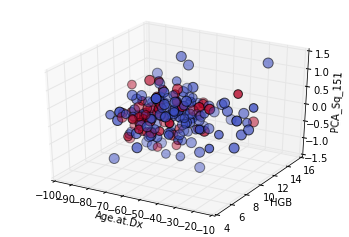

In [26]:
if __name__=='__main__':
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib
    %matplotlib inline

    x = -Q_training['Age.at.Dx']
    y = Q_training['HGB']
    z = -Q_training['PCA_Sq_151']
    area = Q_training['cyto.cat=diploid']*25+75 # 0 to 15 point radiuses
    colors = Q_training['resp.simple']

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel(x.name)
    ax.set_ylabel(y.name)
    ax.set_zlabel(z.name)
    ax.scatter(x, y, z,s=area, c=colors,cmap=matplotlib.cm.coolwarm_r)
    #Blue is 1 and red is 0
    plt.show()

## Information gain of the variables

In [ ]:
#Calculate how much information in gained on each column
#Calculate the entropy of the subset
def information_gain(Table,Dependent,Independent):
    Table=Table[Table[Dependent].notnull()]
    freq=[]
    for dval in Table[Dependent].unique():
        freq+=[sum(Table[Dependent]==dval)]
    Freq=[float(f)/sum(freq) for f in freq]
    E=0
    for f in Freq:
        E+=-f*np.log(f)/np.log(2)
    #print 'Subset Entropy:', E
    Vars=[]

    #Calculate the entropy of each variable
    for ind in Independent:     
        if ind in Categorical:
            IG=E
            for ival in Table[ind].unique():
                if np.isnan(ival):
                    continue
                SubTable=Table[Table[ind]==ival]
                #print SubTable
                freq=[]
                for dval in Table[Dependent].unique():
                    freq+=[sum(SubTable[Dependent]==dval)]
                Freq=[float(f)/sum(freq) for f in freq]
                #print Freq
                ES=0
                for f in Freq:
                    ES+=-f*np.log(f)/np.log(2) if f<>0 else 0
                #print ES
                IG-=float(len(SubTable))/len(Table)*ES
            #print 'Information gain from %s: %f'%(ind,IG)
            Vars+=[(IG,ind)]
        else:
            Threeshold=[]
            prev_SubTableA_len=0
            for ival in np.arange(min(Table[ind]),max(Table[ind]),(max(Table[ind])-min(Table[ind]))/500.0):
                IG=E
                SubTableA=Table[Table[ind]<ival]
                SubTableB=Table[Table[ind]>=ival]
                if len(SubTableA)<1 or len(SubTableB)<1:
                    continue
                if len(SubTableA)==prev_SubTableA_len:
                    continue
                else:
                    prev_SubTableA_len=len(SubTableA)
                freq=[]
                for dval in Table[Dependent].unique():
                    freq+=[sum(SubTableA[Dependent]==dval)]
                Freq=[float(f)/sum(freq) for f in freq]
                #print Freq
                ES=0
                for f in Freq:
                    ES+=-f*np.log(f)/np.log(2) if f<>0 else 0
                #print ES
                IG-=float(len(SubTableA))/len(Table)*ES
                #print SubTable
                freq=[]
                for dval in Table[Dependent].unique():
                    freq+=[sum(SubTableB[Dependent]==dval)]
                Freq=[float(f)/sum(freq) for f in freq]
                #print Freq
                ES=0
                for f in Freq:
                    ES+=-f*np.log(f)/np.log(2) if f<>0 else 0
                #print ES
                IG-=float(len(SubTableB))/len(Table)*ES
                Threeshold+=[(IG,ival)]
            Threeshold.sort(reverse=True)
            #print Threeshold
            #break
            #print 'Information gain from %s: %f at theeshold:%f'%(ind,Threeshold[0][0],Threeshold[0][1])
            if len(Threeshold)>0:
                Vars+=[(Threeshold[0][0],ind,Threeshold[0][1])]
            else:
                Vars+=[(0,ind)]
    Information_gain=pandas.Series([v[0] for v in Vars],index=[v[1] for v in Vars],name='Information Gain')
    Threesholds=pandas.Series([v[2] for v in Vars if len(v)>2],index=[v[1] for v in Vars if len(v)>2],name='Threeshold')
    return pandas.concat([Information_gain,Threesholds],axis=1)

if __name__=='__main__':
    Q_Cat=['resp.simple','Relapse','vital.status','Overall_Survival_binned','Remission_Duration_binned']
    Ts=[]
    for Variable in Q_Cat:
        print Variable
        Independent=[v for v in Q_training.keys() if v in Q_scoring.keys()]
        Ts+=[information_gain(Q_training,Variable,Independent)]
    Information_Gain=pandas.concat(Ts,keys=Q_Cat,axis=1)
    Information_Gain.to_csv('InformationGain.csv')

In [ ]:
#Most important variables in Information Gain
if __name__=='__main__':
    for Variable in Q_Cat:
        A=Information_Gain[Variable]
        A=A.sort('Information Gain',ascending=False)
        A.name=Variable
        print Variable
        print A.head()

In [ ]:
if __name__=='__main__':
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib
    %matplotlib inline

    x = -Q_training['Ras.Stat']
    y = Q_training['NPM1.3542']
    z = -Q_training['FIBRINOGEN']
    area = Q_training['PCA_Sq_38']*25+75 # 0 to 15 point radiuses
    colors = Q_training['resp.simple']

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel(x.name)
    ax.set_ylabel(y.name)
    ax.set_zlabel(z.name)
    ax.scatter(x, y, z,s=area, c=colors,cmap=matplotlib.cm.coolwarm_r)
    #Blue is 1 and red is 0
    plt.show()

## Create Selection tables